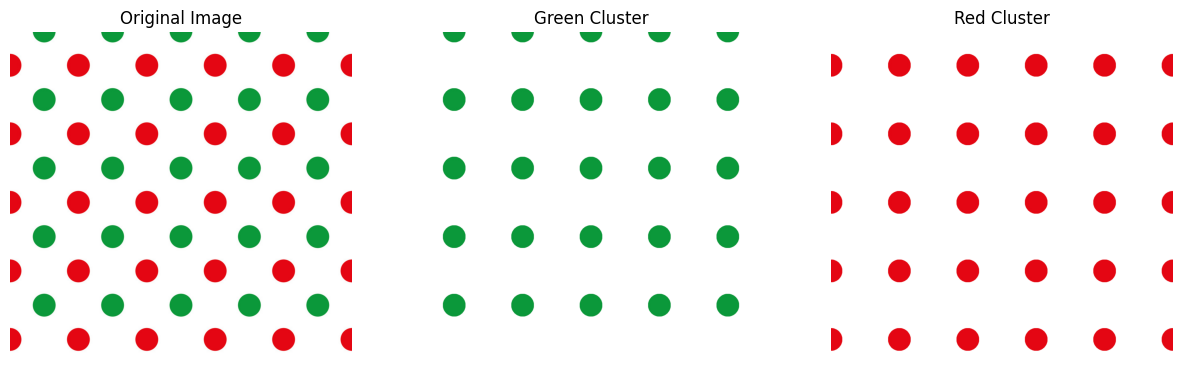

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/red.PNG'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixel_values = image_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria for k-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters (background, red, green)

# Perform k-means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to integers
centers = np.uint8(centers)

# Create masks for each cluster
mask1 = (labels == 0).reshape(image_rgb.shape[:2])
mask2 = (labels == 1).reshape(image_rgb.shape[:2])
mask3 = (labels == 2).reshape(image_rgb.shape[:2])

# Determine which cluster corresponds to the background, red, and green based on the color centers
# Assume background has the highest mean (white), then determine red and green
mean_centers = np.mean(centers, axis=1)
background_index = np.argmax(mean_centers)
red_index = np.argmin(mean_centers)
green_index = 3 - background_index - red_index

masks = [mask1, mask2, mask3]

# Create images for the red and green clusters with white backgrounds
red_cluster_image = np.ones_like(image_rgb) * 255
green_cluster_image = np.ones_like(image_rgb) * 255

red_cluster_image[masks[red_index]] = image_rgb[masks[red_index]]
green_cluster_image[masks[green_index]] = image_rgb[masks[green_index]]

# Plot the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(red_cluster_image)
plt.title('Green Cluster')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(green_cluster_image)
plt.title('Red Cluster')
plt.axis('off')

plt.show()